<a href="https://colab.research.google.com/github/prakhartiwari10/Colab-Notebooks/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [ ]:
what_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evaluating a model",
                      5: "saving and loading the model",
                      6: "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

## 1 Data (preparing and loading)
Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos(Youtube has lot of data)
* Audio like songs or podcasts
* DNA
* Text
We want to get data into numerical representation and build a model to learn patterns in that numerical representation.

First we'll do linear regression
.

In [ ]:
# create known parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# splitting data into training, validation and testing test (not validation on this one)
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Visualize

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data" )

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Plot the predictions in red (if any)
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


 # Show the legend


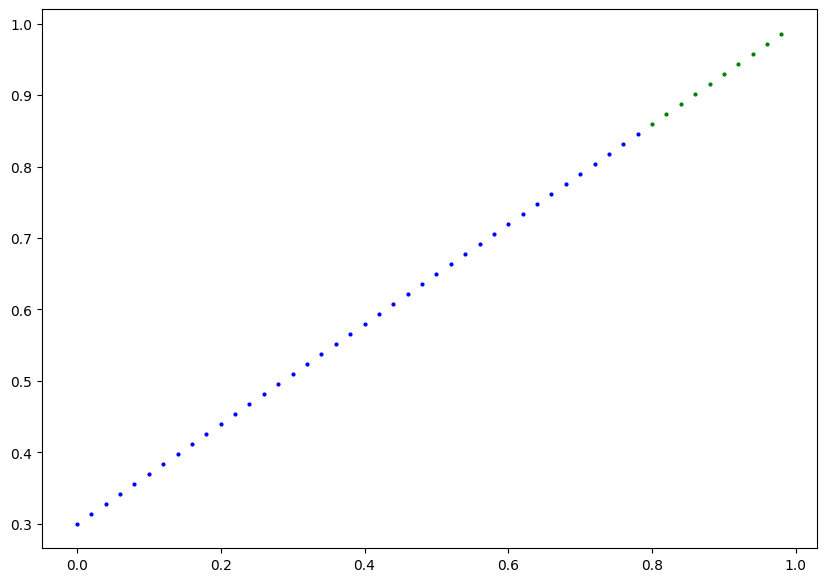

In [ ]:
plot_predictions()

## 2. Build model
Our first PyTorch model

In [ ]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x+self.bias


In [ ]:
# Create a random seed
torch.manual_seed(42)

# create an instance(object) of the model
model_0 = LinearRegressionModel()

# print the parameters of the model
# list(model_0.parameters())

# another method
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using torch.inference_mode()

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

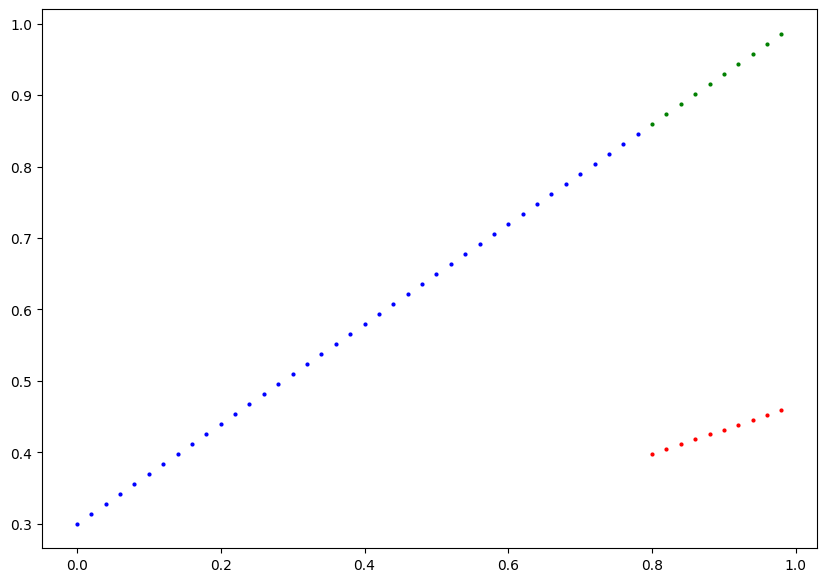

In [ ]:
# Plot the predictions
plot_predictions(predictions=y_preds)

### Training the model
Things we need to train:
* Loss function (list of functions - https://pytorch.org/docs/stable/nn.html#loss-functions)
* Optimizer (https://pytorch.org/docs/stable/optim.html)

Specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer (Stochastic gradient descent in this case)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #lr = learning rate which is a hyperparameter(a value that we set for ourselves)

### Building a training loop (and a testing loop)

A couple of things we need in training loop:
0. Loop throught the data
1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward (move backward to calculate gradients of each params wrt to loss)
5. Optimizer step (gradient descent)

In [ ]:
torch.manual_seed(42)

# set no of epochs (hyperparameter)
epochs = 200

# Track different values
epoch_counts = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  model_0.train() # train mode in PyTorch sets all parameters that require grads to require_grad=True

  # Forward pass
  y_preds = model_0.forward(X_train)

  # Calculate loss
  loss = loss_fn(y_preds, y_train)


  # optimeier zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for eveluation/testing
  with torch.inference_mode(): # may also see torch.no_grad() in older PyTorch code

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
  # Print out what's happening
  if epoch % 10==0:
    epoch_counts.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print the parameters
    print(model_0.state_dict())

Epoch : 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

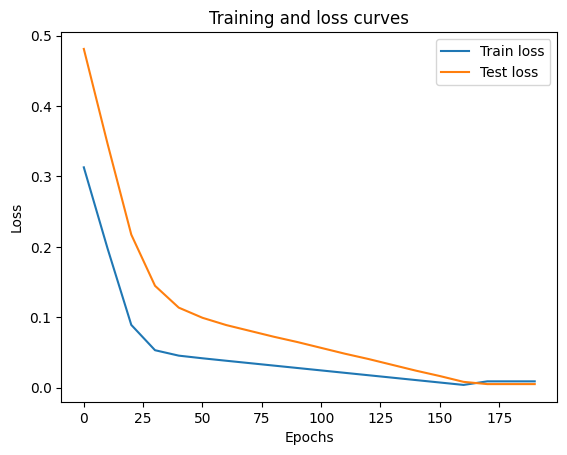

In [ ]:
# Plot the loss curves
with torch.no_grad():
  plt.plot(epoch_counts, loss_values, label="Train loss")
  plt.plot(epoch_counts, test_loss_values, label="Test loss")
  plt.title("Training and loss curves")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

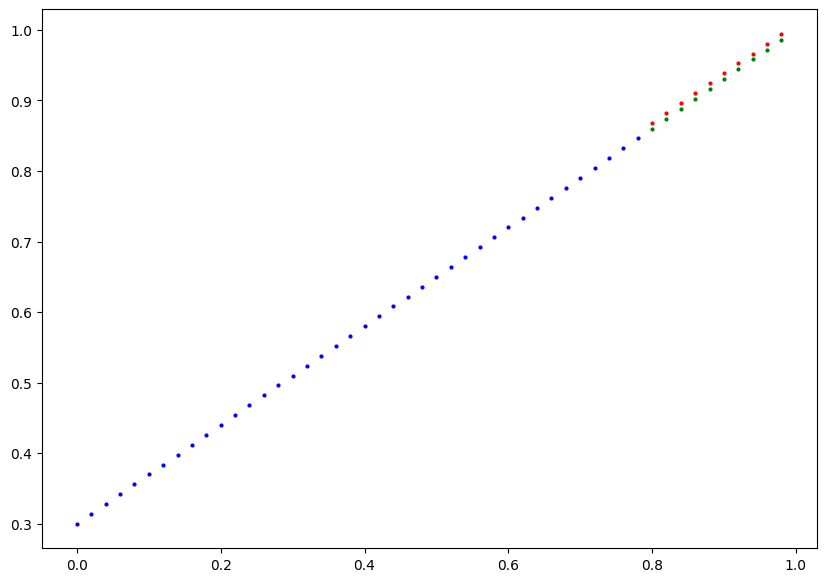

In [ ]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch
Three methods used for saving and loading
  1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
  2. `torch.load()` - allows you to load a saved PyTorch object
  3. `torch.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. create the model's directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. Save the model's state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH) # We could save the whole model also but this is the preferred way

Saving the model to: Models/01_pytorch_workflow_model_0.pth


In [ ]:
# Loading the model
loaded_model_0 = LinearRegressionModel() # loading a new instance
print(loaded_model_0.state_dict())
# Load the saved state dict to this model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


### Putting it all together
Going back through all the steps using device-agnostic code

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


In [ ]:
!nvidia-smi

Sun Mar 31 05:16:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# splitting the data
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Plot the data
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, label="Training data", c="b", s=4)
  plt.scatter(test_data, test_labels, label="Testing data", c="g", s=4)
  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c="r", label="Predictions")

  plt.legend()

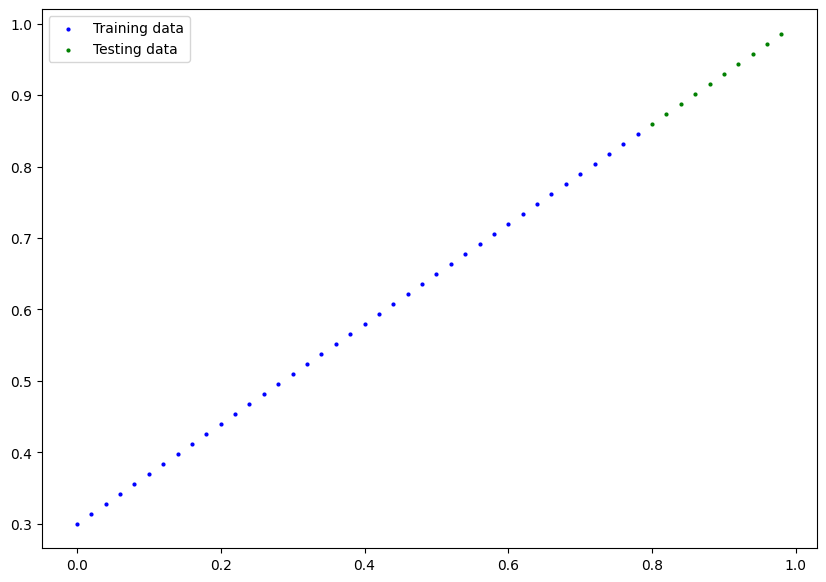

In [ ]:
plot_predictions()

In [ ]:
# Building a PyTorch Linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters also called linear transform, probing layer, fully connected layer, dense layer in tensorflow
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Set the data to use the device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

### Training!

In [ ]:
# Setup the loss
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

# Training Loop
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1.forward(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1.forward(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Loss : 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch : 10 | Loss : 0.439968079328537 | Test loss : 0.4392664134502411
Epoch : 20 | Loss : 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954833924770355 | Test loss : 0.16984669864177704
Epoch : 40 | Loss : 0.09433845430612564 | Test loss : 0.03513690456748009
Epoch : 50 | Loss : 0.023886388167738914 | Test loss : 0.04784907028079033
Epoch : 60 | Loss : 0.019956795498728752 | Test loss : 0.045803118497133255
Epoch : 70 | Loss : 0.016517987474799156 | Test loss : 0.037530567497015
Epoch : 80 | Loss : 0.013089174404740334 | Test loss : 0.02994490973651409
Epoch : 90 | Loss : 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215683650225401 | Test loss : 0.014086711220443249
Epoch : 110 | Loss : 0.00278724217787385 | Test loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test loss : 0.013801801018416882
Epoch : 130 | Loss : 0.001264503

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1.forward(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

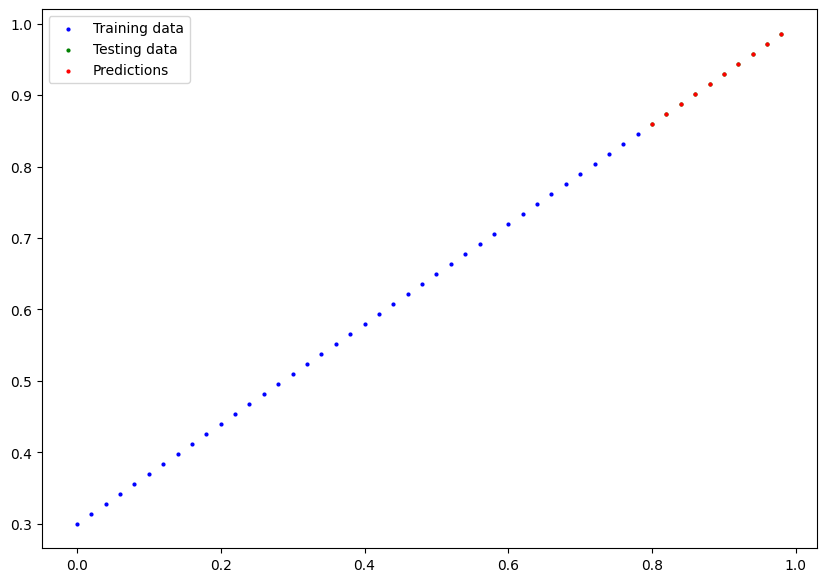

In [ ]:
plot_predictions(predictions=y_preds.cpu())

### Saving and loading the model

In [ ]:
# make name and path for the model
from pathlib import Path
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_PATH_NAME = "01_Python_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_PATH_NAME
MODEL_SAVE_PATH

PosixPath('Models/01_Python_workflow_model_1.pth')

In [ ]:
# Save the model
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Load the model
Loaded_model_1 = LinearRegressionModelV2()
Loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
Loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
Loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate the model
Loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = Loaded_model_1.forward(X_test)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')